# Classification tree

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("kommune_multivariate.csv")
data.head()

,Unnamed: 0,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
2,2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,5.999987,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.000000,6.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.000000,5.0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
data.shape

(3359, 150)

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['Id'],axis=1)

In [4]:
print(data.shape)
data = data.dropna() 
print(data.shape)

data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]

(3359, 148)
(3220, 148)


In [5]:
data.shape

(2599, 148)

In [6]:
import math
import numpy as np

shuffled = data.iloc[np.random.permutation(len(data))]

test = shuffled[:320] 
train = shuffled[320:]

test_y = test["Q16"]
train_y = train["Q16"]

test_X = test.drop(['Q16'],axis=1).values
train_X = train.drop(['Q16'],axis=1).values

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)

## Evaluation

In [8]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(test_X)
print("Accuracy: ", accuracy_score(test_y, predictions))

Accuracy:  0.240625


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_X, train_y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.20175439 0.22149123 0.22587719 0.20833333 0.2       ]
0.21 accuracy with a standard deviation of 0.01


      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1.0     23     8    26     2     4     2    12     7     6     2
2.0      6     8     5     1     1     0     3     1     1     0
3.0     20     5    39     2     4     2     4     4     2     2
4.0      3     3     0     3     1     0     0     2     0     0
5.0      3     0     4     0     0     0     1     2     3     0
6.0      4     2     3     1     0     0     0     2     1     0
7.0     10     0     8     1     1     1     0     1     3     1
8.0     10     2     6     2     0     0     1     4     3     0
9.0      5     4     5     2     1     0     1     0     0     0
10.0     4     0     1     0     1     0     1     1     0     0


<Figure size 720x504 with 0 Axes>

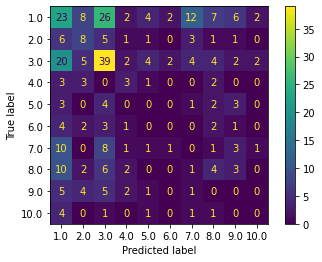

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conmat = confusion_matrix(test_y, predictions)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

plt.figure(figsize = (10,7))
plot_confusion_matrix(clf,test_X,test_y)
plt.savefig("cm_classification_tree.png")

## Feature importance

[Text(446.89023626633684, 1067.7857142857142, 'Kommunestr <= 2.5\ngini = 0.82\nsamples = 2279\nvalue = [632, 220, 618, 105, 121, 63, 191, 146, 121, 62]'),
 Text(248.04390055310495, 1028.9571428571428, 'Q64a_8 <= 0.5\ngini = 0.82\nsamples = 704\nvalue = [196, 75, 149, 47, 12, 9, 134, 37, 27, 18]'),
 Text(186.87834490660967, 990.1285714285715, 'Q58a_2.0 <= 0.5\ngini = 0.812\nsamples = 652\nvalue = [190, 73, 141, 26, 11, 9, 125, 36, 26, 15]'),
 Text(137.8739101592115, 951.3000000000001, 'Q61a <= 7.017\ngini = 0.819\nsamples = 487\nvalue = [120, 61, 125, 22, 10, 6, 86, 26, 20, 11]'),
 Text(81.29968467847543, 912.4714285714286, 'Q3_5 <= 4.505\ngini = 0.824\nsamples = 414\nvalue = [106, 56, 90, 19, 8, 6, 80, 24, 15, 10]'),
 Text(52.15025156799228, 873.6428571428572, 'Q1_arbeid_kom_3 <= 6.675\ngini = 0.81\nsamples = 152\nvalue = [30, 29, 26, 5, 3, 4, 43, 8, 3, 1]'),
 Text(50.9195671652078, 834.8142857142857, 'Q64a_6 <= 0.5\ngini = 0.816\nsamples = 147\nvalue = [30, 29, 26, 5, 3, 4, 38, 8, 3, 

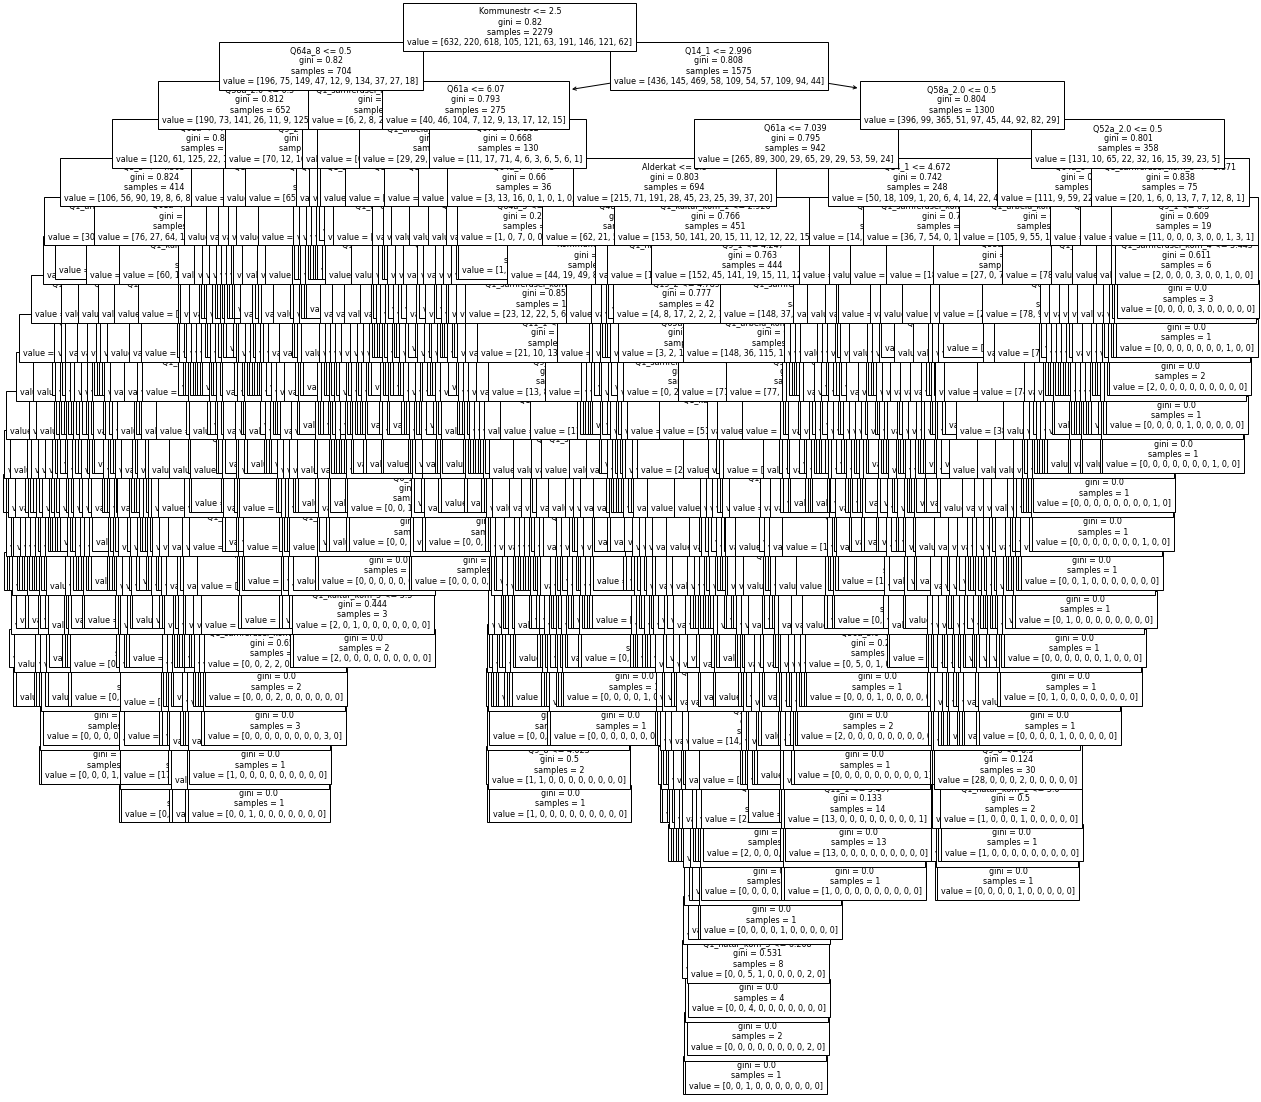

In [11]:
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=8, feature_names=list(train.drop(['Q16'],axis=1)))

In [12]:
# Feature importance scores
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(data.drop(['Q16'],axis=1))).sort_values(ascending=False)

for i in range(len(feature_imp)):
    print(str(feature_imp[i]) + "\t" + str(feature_imp.index[i]))

0.03138569576821734	Q61a
0.029864906777019973	Q1_samferdsel_kom_5
0.026265821087145962	Q14_1
0.02371504749543778	Q1_arbeid_kom_3
0.02330072877622784	Q11_1
0.021854880089242672	Q3_5
0.020595377623056136	Q3_1
0.020160461225523518	Q9_10
0.01978618199243229	Q1_samferdsel_kom_4
0.019415977192868892	Q9_5
0.018873540009065142	Q9_4
0.018305626966111013	Q3_4
0.017373682056827804	Q9_8
0.016987917272871224	Q15_3
0.016672484369215916	Q9_9
0.01574635071218386	Kommunestr
0.01567854132035547	Q1_renovasjon_kom_1
0.01566996048826107	Q1_samferdsel_kom_1
0.01556971978330194	Q9_6
0.015119316203845082	Alderkat
0.014912412498022165	Q1_arbeid_kom_2
0.013918343513146301	Q1_kultur_kom_4
0.013584663572683094	Q1_samferdsel_kom_3
0.013524796023086094	Q1_kultur_kom_5
0.013277402764944006	Q1_samferdsel_kom_2
0.013233790245958534	Q19_2
0.012788792777696926	Q1_kultur_kom_3
0.01265055783060903	Q1_natur_kom_1
0.01235347831649639	Q1_samferdsel_kom_6
0.012215813159884382	Q1_kultur_kom_6
0.012126626404394783	Q9_7
0.012006

No handles with labels found to put in legend.


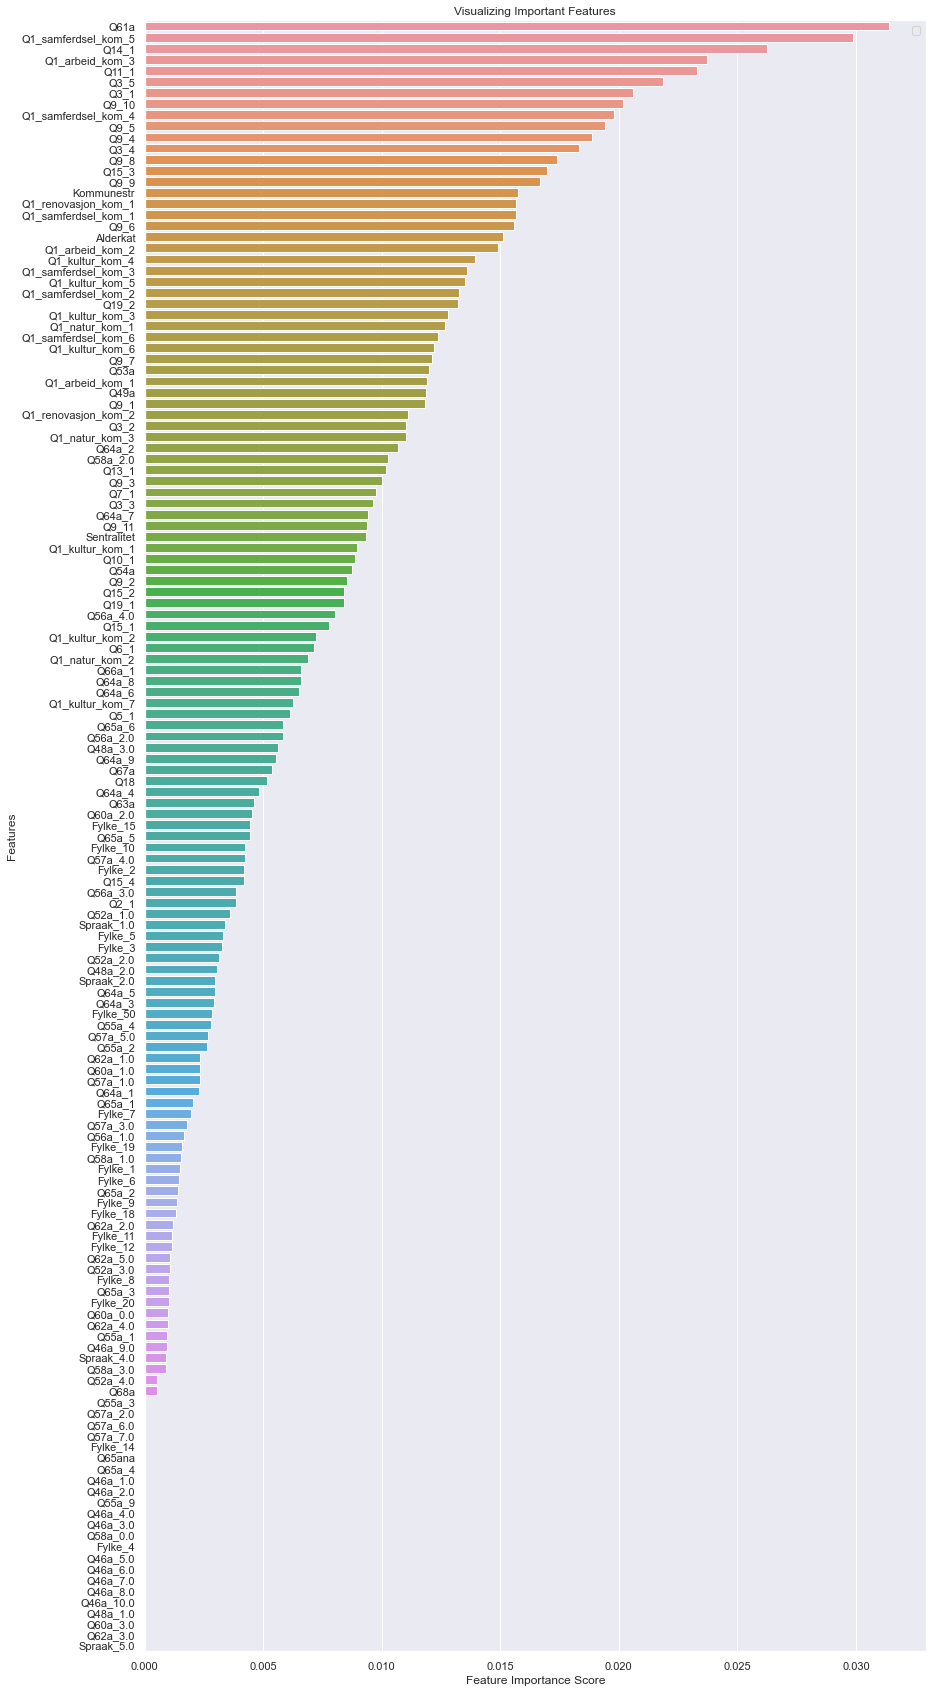

In [13]:
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(14,30)}, font_scale=1)

# Creating a bar plot
snsplt = sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
snsplt.figure.savefig("tree_importance.png")

## Forward stepwise feature selection

In [14]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
tree_sfs = SequentialFeatureSelector(clf_tree,n_features_to_select=10)
tree_sfs.fit(train_X,train_y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          n_features_to_select=10)

In [15]:
tree_cols = tree_sfs.get_support()
tree_new_features = (data.drop(["Q16"],axis=1)).columns[tree_cols]
print(tree_new_features)

Index(['Q64a_2', 'Q64a_8', 'Q48a_3.0', 'Q58a_2.0', 'Q62a_2.0', 'Q56a_1.0',
       'Fylke_1', 'Fylke_4', 'Fylke_6', 'Fylke_20'],
      dtype='object')


In [16]:
list(tree_new_features)

['Q64a_2',
 'Q64a_8',
 'Q48a_3.0',
 'Q58a_2.0',
 'Q62a_2.0',
 'Q56a_1.0',
 'Fylke_1',
 'Fylke_4',
 'Fylke_6',
 'Fylke_20']